This document is used to analyze the data from the *stability test* of the Bruker SkyScan 1272 machine.
Whenever the stability test is run, the process generates a data file called "StabilityTest_15G09089-B.txt".
We load load and display with [NumPy](http://www.numpy.org/) and [matplotlib](http://matplotlib.org/), styled with [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/).

After importing the necessary [packages](https://pypi.python.org/pypi), we set up some notebook defaults.

In [1]:
# Import the necessary packages
import numpy
import matplotlib.pylab as plt
import datetime
from matplotlib.dates import MinuteLocator, DateFormatter
import seaborn as sns
import sys
if sys.version_info[0] < 3:
    # Make the notebook UTF-8-aware if we're not running Python3
    reload(sys)
    sys.setdefaultencoding("utf-8") # http://stackoverflow.com/a/19089210/323100
import glob
import os
import pandas

In [2]:
# Setup notebook defaults
%matplotlib inline
# Display all images the same way
plt.rc('image', cmap='gray', interpolation='nearest')
# Size up figures a bit
plt.rcParams['figure.figsize'] = (10, 5)

To be able to efficiently load the data in the log file, we first need to *massage* the data.
We do this by defining so-called [lambda functions](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which convert the input to something usable.
Afterwards we actually load the data and format the time axis to give us something nice in the output plots.

In [4]:
# get the freshest data file and read it into a dataframe
files = glob.glob(os.path.join('datafiles', '*.txt'))
files.sort(key=os.path.getmtime)
print('From the files')
for i in files:
    print('\t-%s from %s' % (i, datetime.datetime.fromtimestamp(os.path.getmtime(i)).strftime('%Y.%m.%d, at %H:%M')))
print('we use the freshest one, namely %s' %files[-1])

From the files
	-datafiles/StabilityTest_15G09089-B_20160819.txt from 2017.03.17, at 16:56
	-datafiles/StabilityTest_15G09089-B_20170317.txt from 2017.03.17, at 16:58
	-datafiles/StabilityTest_15G09089-B_20161207.txt from 2017.03.17, at 16:58
we use the freshest one, namely datafiles/StabilityTest_15G09089-B_20161207.txt


In [3]:
# Massage text in the file so we can plot it directly
converttime = lambda x: datetime.datetime.strptime(x, '%Hh:%Mm:%Ss')
convertpercent = lambda x: float(x.strip("%"))
convertcelsius = lambda x: x.strip("C")

In [47]:
date =  datetime.datetime.strptime(str(pandas.read_csv(files[0],
                                                       skiprows=7,
                                                       nrows=1,
                                                       sep='\t',
                                                       header=None)).split('Time:')[1], ' %b %d, %Y  %H:%M:%S')

2016-08-29 08:49:27


In [54]:
voltage =  float(str(pandas.read_csv(files[0],
                               skiprows=6,
                               nrows=1,
                               sep='\t',
                               header=None)).split(':')[1].split('kV')[0])
print(voltage)

80.0


In [57]:
current =  float(str(pandas.read_csv(files[0],
                               skiprows=6,
                               nrows=1,
                               sep='\t',
                               header=None)).split(':')[2].split('uA')[0])
print(current)

125.0


datafiles/StabilityTest_15G09089-B_20160819.txt


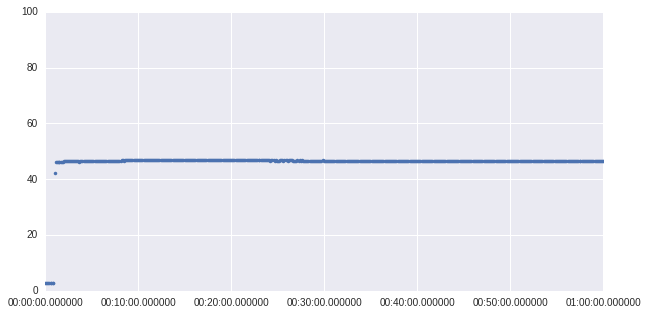

datafiles/StabilityTest_15G09089-B_20170317.txt


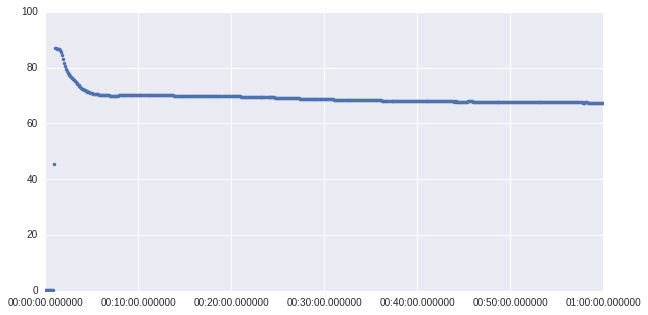

datafiles/StabilityTest_15G09089-B_20161207.txt


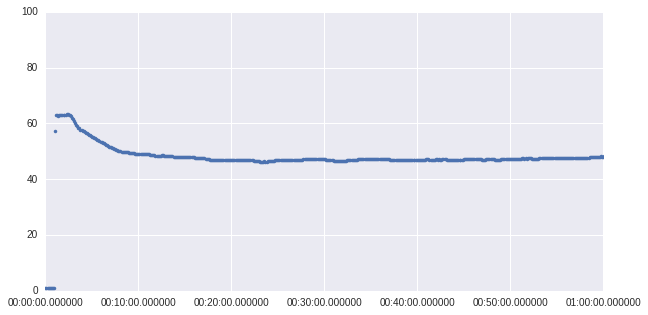

In [55]:
for fle in files:
    df=pandas.read_table(fle, skiprows=11, skipfooter=1, engine='python',
                         converters={'time': converttime,
                                     'intensity': convertpercent,
                                     'CCD chip': convertcelsius})
    print(fle)
    plt.plot(df['time'], df['intensity'], marker='.', ls='')
    plt.xlim(['1900-01-01 00:00:00','1900-01-01 01:00:00'])
    plt.ylim([0, 100])    
    plt.show()

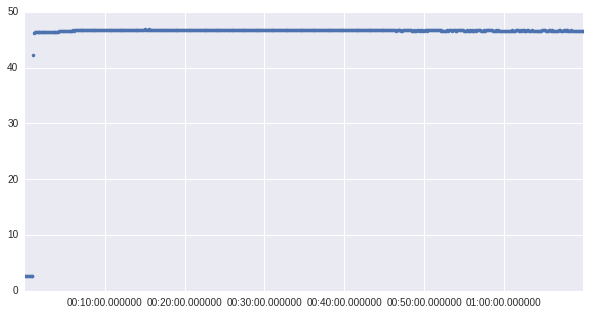

In [113]:
plt.plot(df['time'], df['intensity'], marker='.', ls='')
ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(minuteFmt)


In [52]:
plt.plot(df['intensity'].strip('%'))

AttributeError: 'Series' object has no attribute 'strip'

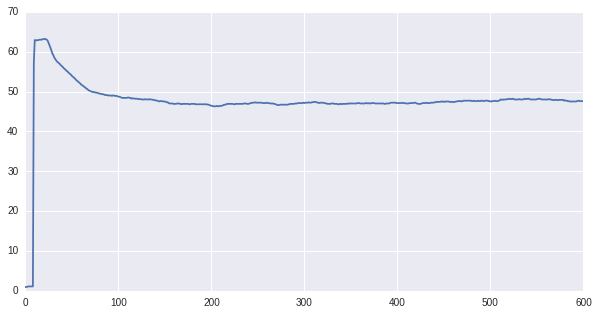

In [43]:
plt.plot(data['intensity'])

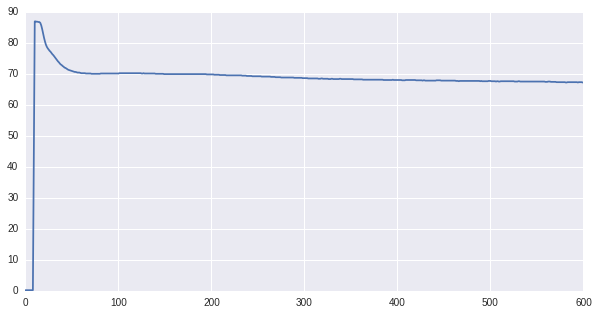

In [45]:
plt.plot(data['intensity'])

Now that we loaded the data, we can use the intensity and temperature values to calculate both their means.
Since both values rise and drop significantly at the beginnig, we discard some values at the beginning.

In [31]:
# Calculate the mean intensity and temperature (after a certain time step)
# We use these mean values to adjust the range of the plots below
after = 100
print('Step %s corresponds to discarding the first %s minutes and '
      '%s seconds.' % (after, data['time'][after].minute, data['time'][after].second))
mi = round(numpy.mean(data['intensity'][after:]),1)
mt = round(numpy.mean(data['temp'][after:]),1)
print('The mean intensity (after %s steps) is %s%%.' % (after, mi))
print('The mean temperature (after %s steps) is %s°C.' % (after, mt))

Step 100 corresponds to discarding the first 9 minutes and 47 seconds.
The mean intensity (after 100 steps) is 68.5%.
The mean temperature (after 100 steps) is 13.7°C.


Now we plot the values, first all in the same plot, then zoomed in on the y axis.
Since we plot again, we have to get the color values from the current Seaborn palette and specify the color of each plot.

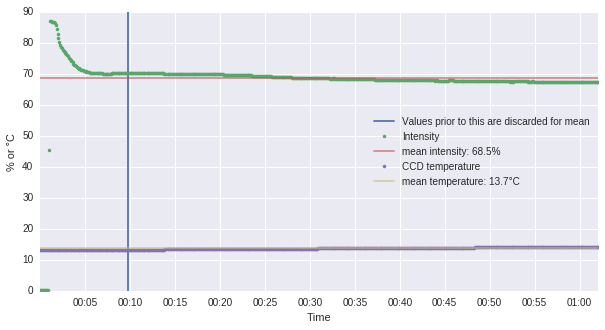

In [32]:
# Overview plot
range = 1.0
linealpha = 0.618
fig, ax = plt.subplots()
ax.axvline(data['time'][after], c=sns.color_palette()[0],
           label='Values prior to this are discarded for mean')
ax.plot(data['time'], data['intensity'], label='Intensity',
        marker='.', ls='', c=sns.color_palette()[1])
ax.axhline(mi, alpha=linealpha, label='mean intensity: %s%%' % mi,
           c=sns.color_palette()[2])
ax.plot(data['time'], data['temp'], label='CCD temperature',
        marker='.', ls='', c=sns.color_palette()[3])
ax.axhline(mt, alpha=linealpha, label='mean temperature: %s°C' % mt,
           c=sns.color_palette()[4])
plt.legend(loc='best')
plt.ylabel('% or °C')
plt.xlabel('Time')
ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(minuteFmt)
plt.show()

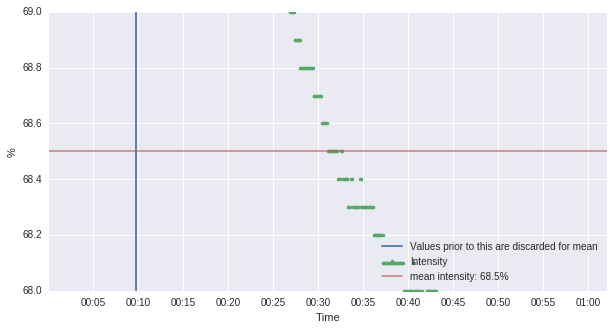

In [33]:
# Detailed intensity
fig, ax = plt.subplots()
ax.axvline(data['time'][after], c=sns.color_palette()[0],
           label='Values prior to this are discarded for mean')
ax.plot(data['time'], data['intensity'], label='Intensity',
        marker='.', ls='', c=sns.color_palette()[1])
ax.axhline(mi, alpha=linealpha, label='mean intensity: %s%%' % mi,
           c=sns.color_palette()[2])
plt.legend(loc='lower right')
plt.ylabel('%')
plt.xlabel('Time')
ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(minuteFmt)
plt.ylim([mi - range / 2, mi + range / 2])
plt.show()

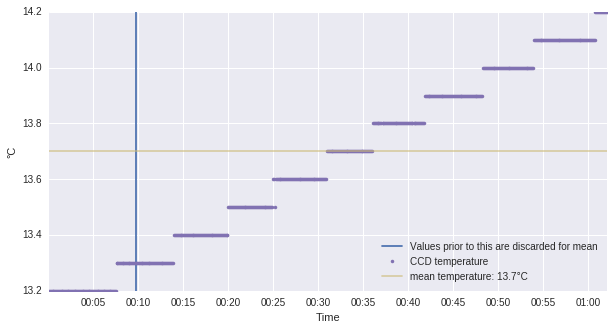

In [34]:
# Detailed CCD temperature
fig, ax = plt.subplots()
ax.axvline(data['time'][after], c=sns.color_palette()[0],
           label='Values prior to this are discarded for mean')
ax.plot(data['time'], data['temp'], label='CCD temperature',
        marker='.', ls='', c=sns.color_palette()[3])
ax.axhline(mt, alpha=linealpha, label='mean temperature: %s°C' % mt,
           c=sns.color_palette()[4])
plt.legend(loc='lower right')
plt.ylabel('°C')
plt.xlabel('Time')
ax.xaxis.set_major_locator(minutes)
ax.xaxis.set_major_formatter(minuteFmt)
plt.ylim([mt - range / 2, mt + range / 2])
plt.show()